# Análise do Ensaio do Aeropêndulo ccom Controlador PI

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import control as ct
import scipy.signal as sg
from control.matlab import *
import scienceplots

%config InlineBackend.figure_format='retina'
plt.style.use(["science", "notebook"])

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

**Importando as bibliotecas usadas para a análise**

In [2]:
dados_malha_aberta = pd.read_csv("../interface_aeropendulo/interface/dados_de_ensaio/arquivo_4_6_2023_0_51_12.csv",
                                 header = None, sep=',').values
dados_malha_aberta

array([[        nan, 0.00000e+00, 1.00000e+00, ..., 4.00000e+00,
        5.00000e+00, 6.00000e+00],
       [0.00000e+00, 3.00000e+01, 3.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 9.19655e+02],
       [1.00000e+00, 3.00000e+01, 3.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 9.19675e+02],
       ...,
       [1.91500e+03, 3.00000e+01, 3.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 9.57992e+02],
       [1.91600e+03, 3.00000e+01, 3.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 9.58012e+02],
       [1.91700e+03, 3.00000e+01, 3.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 9.58032e+02]])

In [14]:
dados_malha_aberta[0][0] = 0.0
dados_malha_aberta[:,0]

array([0.000e+00, 0.000e+00, 1.000e+00, ..., 1.915e+03, 1.916e+03,
       1.917e+03])

**Obtendo os sinais do ensaio**

In [26]:
tempo = np.array(dados_malha_aberta[:,7])
sinal_ref  = np.array(dados_malha_aberta[:,1])
sinal_saida = np.array(dados_malha_aberta[:,2])
sinal_controle = np.array(dados_malha_aberta[:,4])


## Plotagem dos sinais

###  **Sinais de Referência e de Saída**


Periodo de Amostragem: 0.02


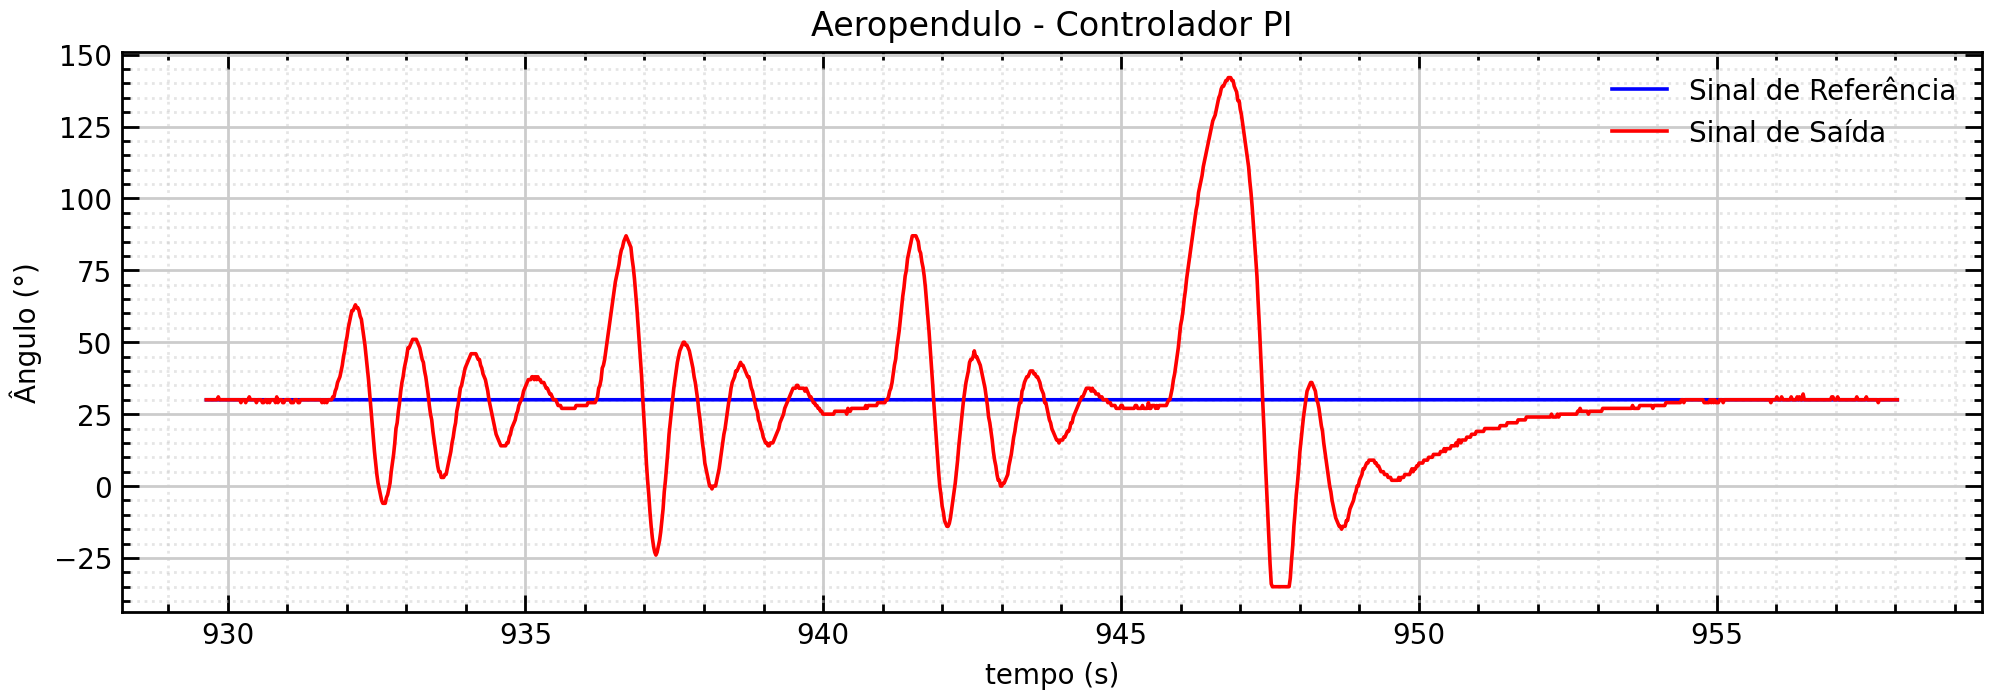

In [36]:
Ts = 0.02
print('\nPeriodo de Amostragem:', Ts)


plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(tempo[500:], sinal_ref[500:], c = 'b', lw=1.3, label = "Sinal de Referência")
plt.plot(tempo[500:], sinal_saida[500:], c = 'r', lw=1.3, label = "Sinal de Saída")

plt. title('Aeropendulo - Controlador PI', fontsize=12)
plt.ylabel('Ângulo (°)', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10)

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

### **Sinal de Controle**

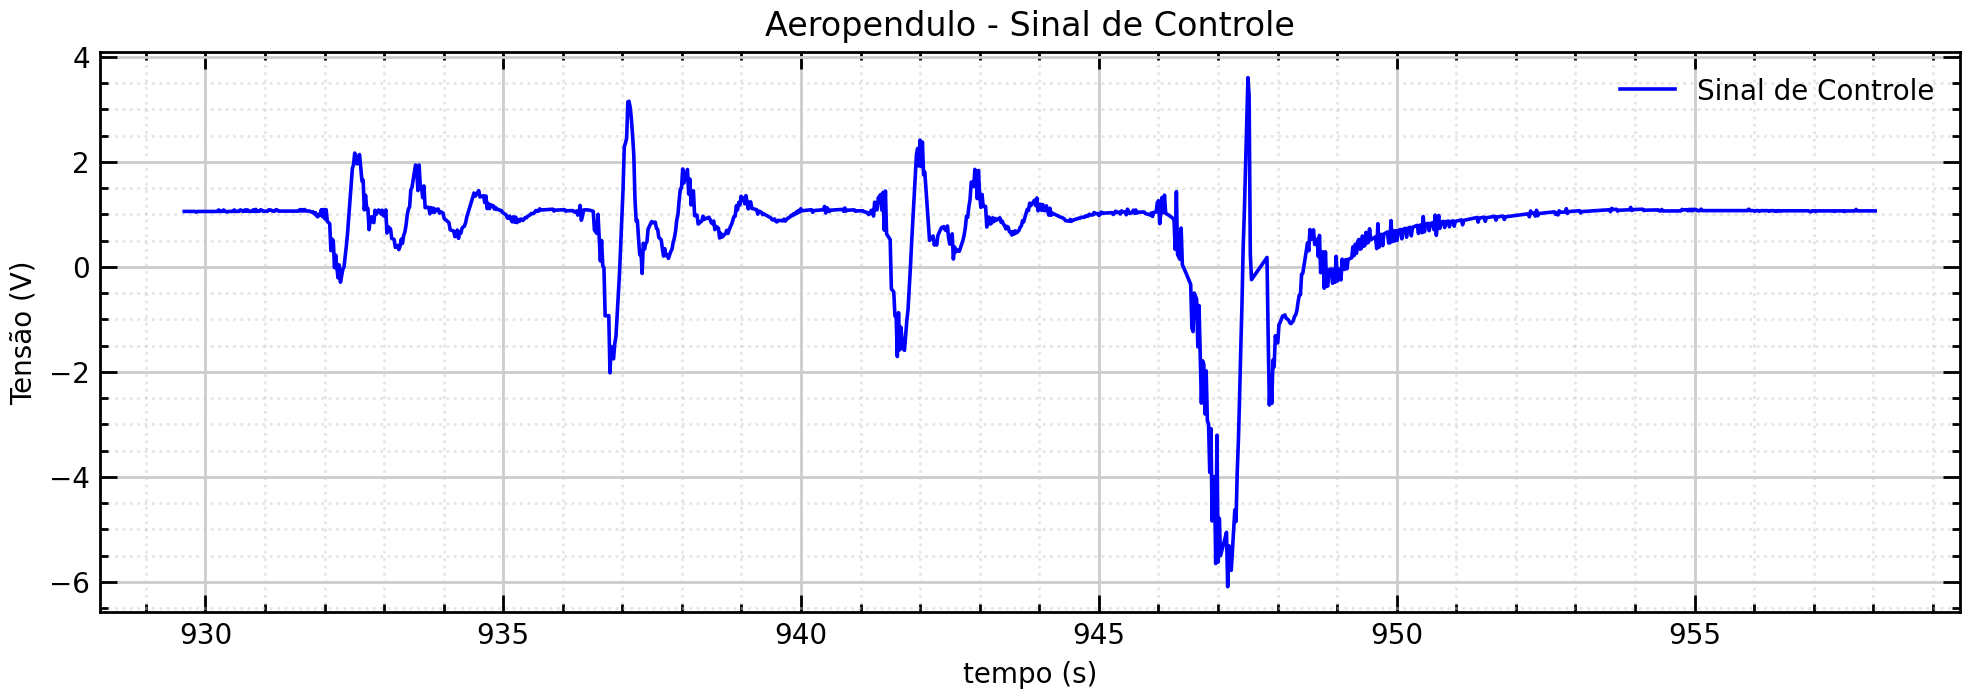

In [37]:
plt.figure(figsize=(12, 8))
plt.subplot(212)
plt.plot(tempo[500:], sinal_controle[500:], c = 'b', lw=1.3, label = "Sinal de Controle")

plt. title('Aeropendulo - Sinal de Controle', fontsize=12)
plt.ylabel('Tensão (V)', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10)

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()